In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Re_Car_Purchasing_Data.csv',encoding='ISO-8859-1')
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Country']= label_encoder.fit_transform(data['Country'])

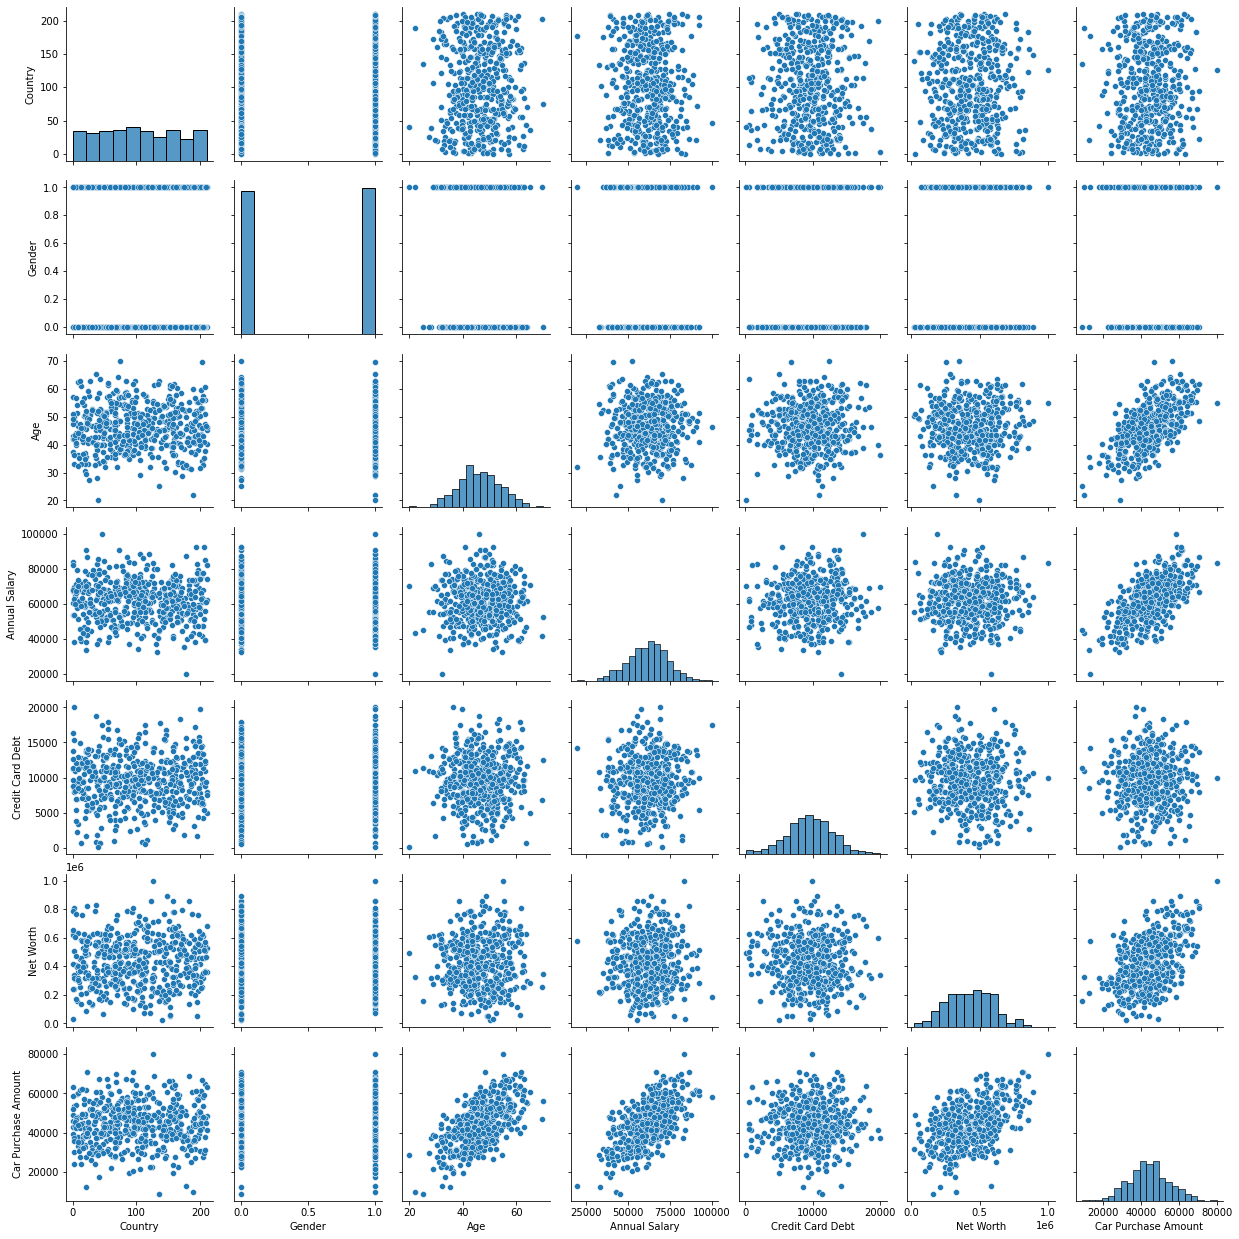

In [ ]:
sns.pairplot(data)

In [ ]:
X = data.drop(['Customer Name','Customer e-mail','Car Purchase Amount'],axis=1)

In [ ]:
Y = data.iloc[:,-1]


In [ ]:
arr=np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [ ]:
xtrain.shape

(375, 6)

In [ ]:
import tensorflow as tf
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
ypred=model.predict(xtest)

4/4 [==============================] - 0s 6ms/step


In [ ]:
r2_score(ytest,ypred)

0.6457616888571363

In [ ]:
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
Xnew = sca.fit_transform(X)
Xnew

array([[-1.25451191, -1.01207287, -0.55074911,  0.05857619,  0.57427133,
        -1.11046945],
       [-1.42027285, -1.01207287, -0.67383422,  0.38657041, -0.0099515 ,
         0.57392937],
       [-1.68549034,  0.98807114, -0.38750768, -0.71236095,  0.4454518 ,
         1.19397625],
       ...,
       [ 0.68489103,  0.98807114,  0.96624515,  0.57832106,  0.28802326,
         1.92114437],
       [-1.30424019,  0.98807114,  1.62075409, -1.05333541,  1.26384749,
        -0.54019026],
       [ 1.76233711,  0.98807114,  0.06140832, -0.06470949, -0.06205457,
         0.18153098]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrainN,xtestN,ytrainN,ytestN=train_test_split(Xnew,Y,random_state=0)

In [ ]:
hist_2 = model.fit(xtrainN, ytrainN, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 80ms/step - loss: 2019380608.0000 - r2_score: -19.2768 - val_loss: 2176939008.0000 - val_r2_score: -16.4835
Epoch 2/100
10/10 [==============================] - 1s 76ms/step - loss: 2019312896.0000 - r2_score: -18.7849 - val_loss: 2176812032.0000 - val_r2_score: -16.4824
Epoch 3/100
10/10 [==============================] - 1s 73ms/step - loss: 2019171328.0000 - r2_score: -20.9348 - val_loss: 2176548096.0000 - val_r2_score: -16.4800
Epoch 4/100
10/10 [==============================] - 1s 77ms/step - loss: 2018878848.0000 - r2_score: -18.7604 - val_loss: 2175956736.0000 - val_r2_score: -16.4748
Epoch 5/100
10/10 [==============================] - 1s 77ms/step - loss: 2018213888.0000 - r2_score: -20.3562 - val_loss: 2174631168.0000 - val_r2_score: -16.4631
Epoch 6/100
10/10 [==============================] - 1s 74ms/step - loss: 2016722688.0000 - r2_score: -18.5086 - val_loss: 2171799808.0000 - val_r2_score: -16.4380
Epoch 7/100
10/1

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

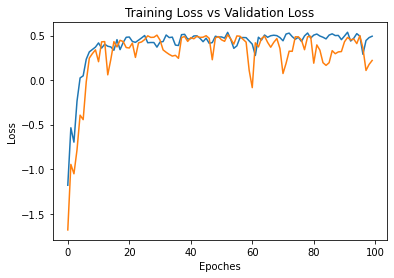

In [ ]:
plt.plot(hist.history['r2_score'],label='Training Loss')
plt.plot(hist.history['val_r2_score'],label='Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')

In [ ]:
ypred=model.predict(xtestN)

4/4 [==============================] - 0s 6ms/step


In [ ]:
r2_score(ytestN,ypred)

0.6983021788486041

In [ ]:
Y

(500,)

In [ ]:
ynew = sca.fit_transform(arr.reshape(-1,1))
ynew.shape

(500, 1)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain1,xtest1,ytrain1,ytest1=train_test_split(Xnew,ynew,random_state=0)

In [ ]:
hist=model.fit(xtrain1, ytrain1, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 3s 80ms/step - loss: 0.9574 - r2_score: -0.0138 - val_loss: 0.9906 - val_r2_score: 0.0367
Epoch 2/100
10/10 [==============================] - 1s 75ms/step - loss: 0.8126 - r2_score: 0.1228 - val_loss: 0.8107 - val_r2_score: 0.1944
Epoch 3/100
10/10 [==============================] - 1s 75ms/step - loss: 0.6940 - r2_score: 0.2500 - val_loss: 0.6745 - val_r2_score: 0.3227
Epoch 4/100
10/10 [==============================] - 1s 76ms/step - loss: 0.5577 - r2_score: 0.4055 - val_loss: 0.5586 - val_r2_score: 0.4311
Epoch 5/100
10/10 [==============================] - 1s 78ms/step - loss: 0.4497 - r2_score: 0.5206 - val_loss: 0.4905 - val_r2_score: 0.5096
Epoch 6/100
10/10 [==============================] - 1s 78ms/step - loss: 0.3688 - r2_score: 0.5715 - val_loss: 0.4198 - val_r2_score: 0.5698
Epoch 7/100
10/10 [==============================] - 1s 76ms/step - loss: 0.3039 - r2_score: 0.6683 - val_loss: 0.3620 - val_r2_score: 0.6322
Epoch

Text(0.5, 1.0, 'Training Loss vs Validation Loss')

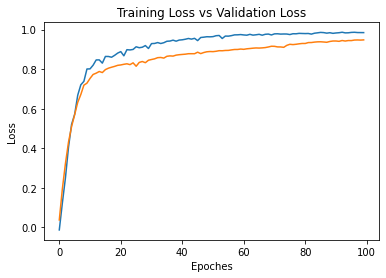

In [ ]:
plt.plot(hist.history['r2_score'],label='Training Loss')
plt.plot(hist.history['val_r2_score'],label='Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')

In [ ]:
ypred=model.predict(xtest1)

4/4 [==============================] - 0s 8ms/step


In [ ]:
r2_score(ytest1,ypred)

0.9648357234745617